In [1]:
import sys
sys.path.append("../")

import utils
from crbm import CRBM
import analysis_methods as am

from glob import glob
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

import math
import subprocess as sp
import matplotlib.image as mpimg

In [2]:
# Directory of Stored CRBM
mdir = "/mnt/D1/globus/ribo_trained_crbms/"
rounds = "rfam"

In [11]:
# generate weights
checkp, version_dir = am.get_checkpoint_path(rounds, rbmdir=mdir)
tmp = CRBM.load_from_checkpoint(checkp)
utils.all_weights(tmp, name=version_dir +rounds)

../utils.py:935: MatplotlibDeprecationWarning: Passing the minor parameter of set_ticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  ax.set_xticks(xticks, xtickslabels)


In [3]:
def assign(x):
    if x < 10:
        return "L" # low
    elif x < 1000:
        return "M" # medium
    else:
        return "H" # High
all_data = am.fetch_data([rounds], dir="../../datasets/ribo", assignment_function=assign, threads=12, molecule="rna")

Process Time 0.06985330581665039


In [4]:
import analysis_methods_crbm as am_crbm
import analysis_methods as am

In [5]:
checkp, version_dir = am.get_checkpoint_path(rounds, rbmdir=mdir)
ribo_crbm = CRBM.load_from_checkpoint(checkp)

../utils.py:931: MatplotlibDeprecationWarning: Passing the minor parameter of set_ticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  ax.set_xticks(xticks, xtickslabels)
../utils.py:931: MatplotlibDeprecationWarning: Passing the minor parameter of set_ticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  ax.set_xticks(xticks, xtickslabels)
../utils.py:931: MatplotlibDeprecationWarning: Passing the minor parameter of set_ticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  ax.set_xticks(xticks, xtickslabels)
../utils.py:931: MatplotlibDeprecationWarning: Passing the minor parameter of set_ticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  ax.set_xticks(xticks, xtickslabels)


<Figure size 1100x4500 with 0 Axes>

<Figure size 1100x4500 with 0 Axes>

<Figure size 1100x4500 with 0 Axes>

<Figure size 1100x4500 with 0 Axes>

<Figure size 1100x4500 with 0 Axes>

<Figure size 1100x4500 with 0 Axes>

<Figure size 1100x4500 with 0 Axes>

<Figure size 1100x4500 with 0 Axes>

<Figure size 1100x4500 with 0 Axes>

<Figure size 1100x4500 with 0 Axes>

<Figure size 1100x4500 with 0 Axes>

<Figure size 1100x4500 with 0 Axes>

<Figure size 1100x4500 with 0 Axes>

<Figure size 1100x4500 with 0 Axes>

<Figure size 1100x4500 with 0 Axes>

<Figure size 1100x4500 with 0 Axes>

<Figure size 1100x4500 with 0 Axes>

<Figure size 1100x4500 with 0 Axes>

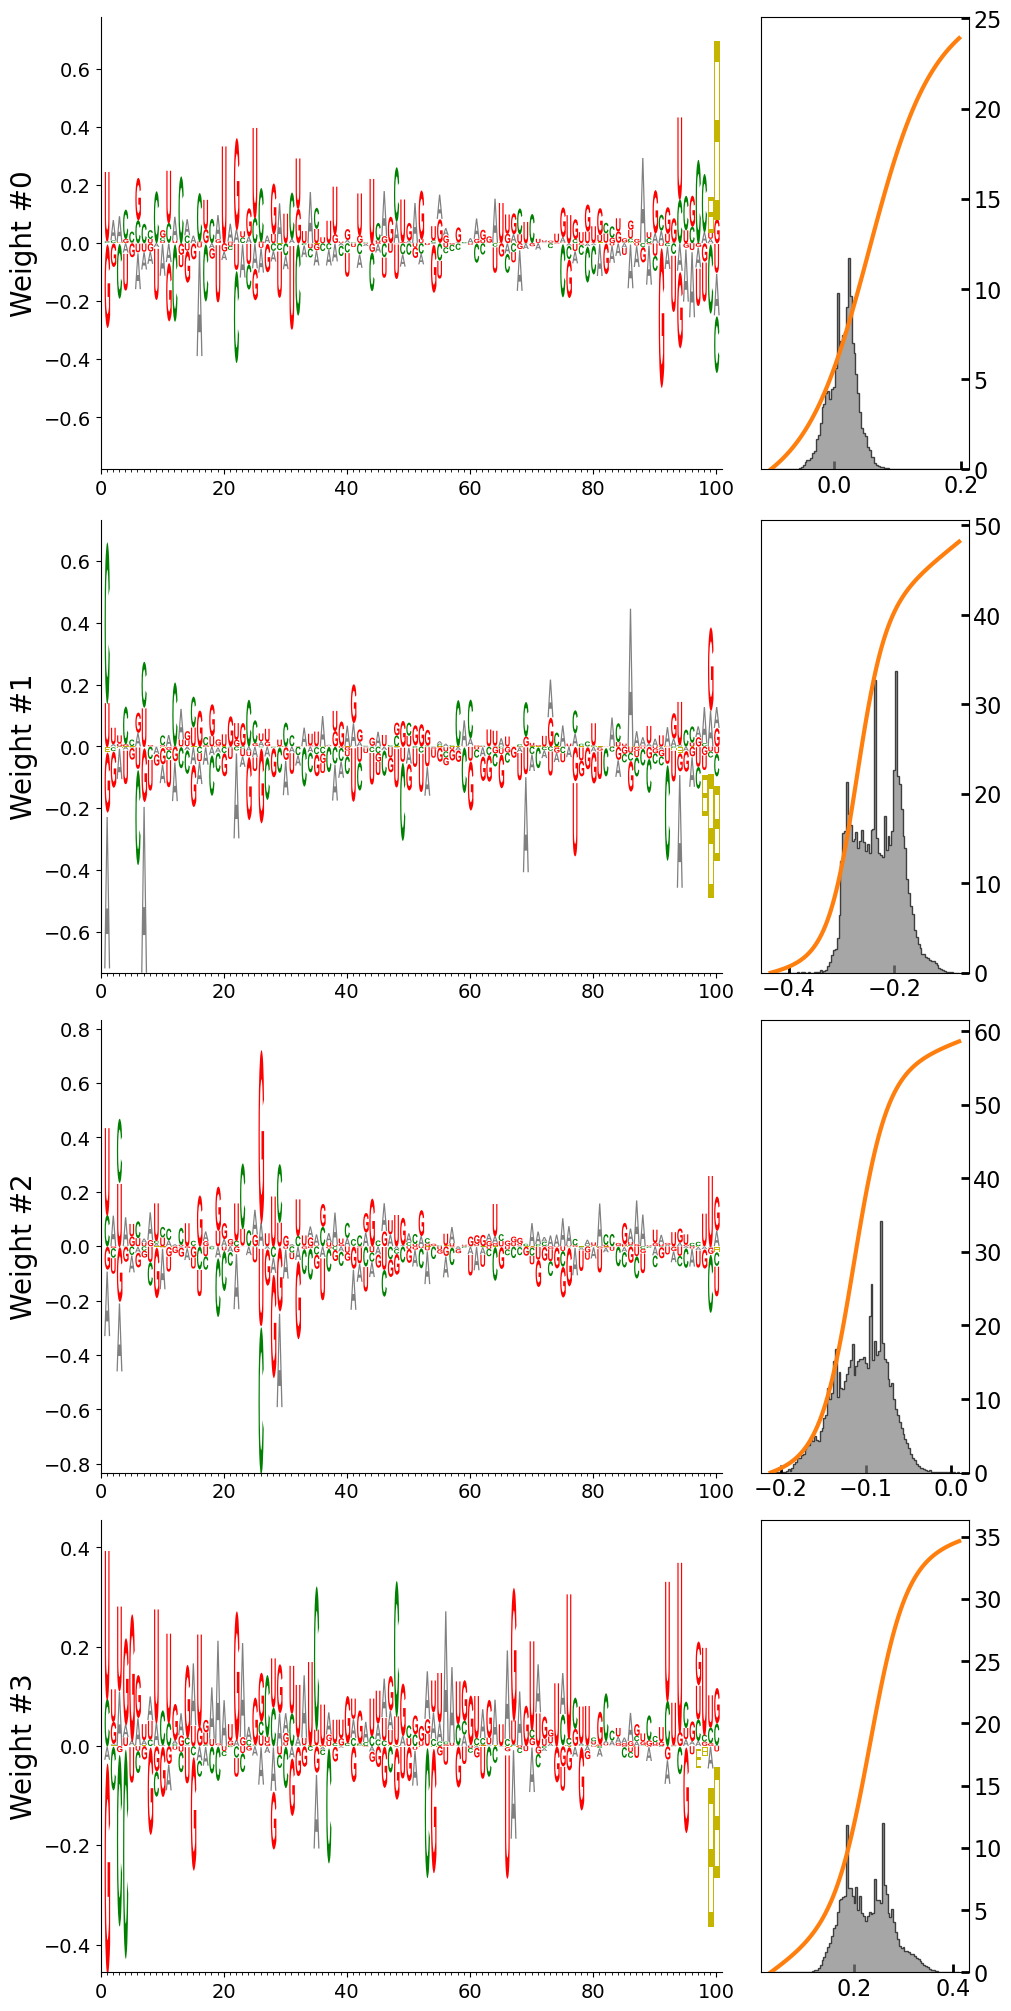

In [11]:
am_crbm.data_with_weights_plot(ribo_crbm, all_data, "hidden100", [0, 1, 2, 3], kdim="mean", data="mean")

In [ ]:
am_crbm.data_with_weights_plot(ribo_crbm, all_data, "hidden112", [0, 1, 2, 3], kdim="mean", data="mean")

In [6]:
seqs, hiddens = utils.gen_data_lowT(ribo_crbm, beta=2, which = 'marginal' ,Nchains=100, Lchains=500, Nthermalize=200, Nstep=2, N_PT=5, reshape=True, update_betas=False)

In [9]:
def gen_to_pd(molecule):
    gen_seqs = utils.cat_to_seq(seqs.argmax(-1).detach().numpy(), molecule=molecule)
    return pd.DataFrame({"sequence": gen_seqs})

lowT_gen_seqs = gen_to_pd("rna")
_, gen_likelihoods = ribo_crbm.predict(lowT_gen_seqs)
lowT_gen_seqs["likelihood"] = gen_likelihoods

In [18]:
lowT_gen_seqs.sort_values("likelihood", ascending=False, inplace=True)
lowT_gen_seqs.head(200)

,sequence,likelihood
43437,gucuacugcuaucacacccuucauaccccaaauagcauuacuaaug...,5012.086354
9978,guuugcgaccauaccaucuuuaagccaccagaucugguccaaaacg...,5011.126257
40734,gucuacggucauucuacccugaauacacccuaauucauccaaacuu...,5006.982261
38849,uccugcaccuauaucacccuuaaaaccccauguuccaaucauauua...,5005.881982
30874,gccuacagccauaucacucugaauguaucacaucucaauccaaaua...,5005.196615
...,...,...
44440,uccaucggccauaucccccugaaaaugcccaauuucucacaauagu...,4968.843688
19900,accaacuuccaucucacccugaauacacccagucccauuaugauua...,4968.726870
35028,aucugcggccacaucccccugaaacauccccauuucagucuaauua...,4968.720955
8266,ggcugcggccauaccacccuuuauacaccguuucuuguugacaauc...,4968.599161


In [14]:
def plot_likelihood_df(likeli_df, label, title=None, xaxislabel="log-likelihood", xlim=None, cdf=False):
    colors = am.supported_colors
    fig, axs = plt.subplots(1, 1, sharex=True, sharey=False)
    if xlim is not None:
        axs.set_xlim(*xlim)
    y = sns.kdeplot(likeli_df.likelihood, shade=False, alpha=0.5, color=colors[0], ax=axs, label=label, cumulative=cdf)
    y.set(xlabel=xaxislabel)
    axs.legend()
    if title:
        fig.suptitle(title)
    else:
        fig.suptitle("Log-Likelihood Gaussian KDE Curve of Likelihoods by Dataset")
    plt.show()

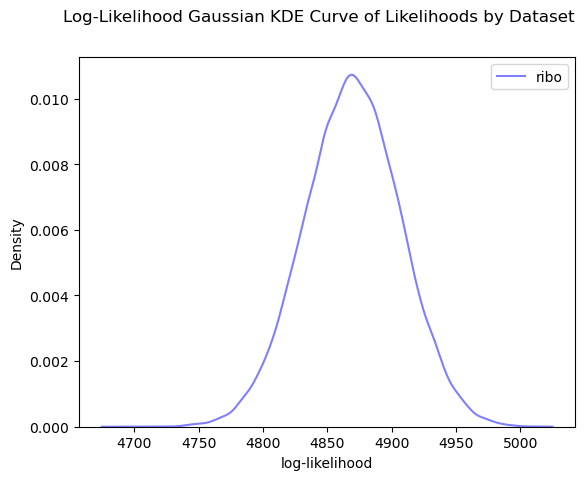

In [16]:
plot_likelihood_df(lowT_gen_seqs, "ribo")

In [21]:
lowT_gen_seqs.sequence[100]

'guaugcggccacgccgccuugaauacaccacauucuaacaauaaugcaaaauuuaggugucaggggcccgaguuuucccugggggaggacaccgcaagcgaaauuguggcuuugccugau-'

In [22]:

seqs = lowT_gen_seqs.sequence.tolist()
likelis = lowT_gen_seqs.likelihood.tolist()

sys.path.append("../../")
import datasets.data_prep as dp

dp.write_fasta(seqs, [round(x,2) for x in likelis], "ribo_crbm_generated")

In [24]:
import torch
import clustering_methods as cm

def dataframe_to_input_crbm(dataframe, base_to_id, v_num, q, weights=False):
    seqs = dataframe["sequence"].tolist()
    oh_ten = torch.zeros((len(seqs), v_num, q), dtype=torch.long)
    for iid, seq in enumerate(seqs):
        for n, base in enumerate(seq):
            oh_ten[iid, n, base_to_id[base]] = 1
    if weights:
        weights = dataframe["copynum"].tolist()
        return oh_ten, weights
    else:
        return oh_ten

# Produces flat vector of Inputs of each hidden unit (reduced over the convolution dimension (k) by sum or mean)
def flatten_and_reduce_input(Ih, reduction="sum"):
     # Iuk (Batch, hidden number (u), conv number (k))
    if reduction == "sum":
        return torch.cat([Iuk.sum(2) for Iuk in Ih], 1)
    elif reduction == "mean":
        return torch.cat([Iuk.mean(2) for Iuk in Ih], 1)
    else:
        print(f"Reduction {reduction} not supported", file=sys.stderr)
        exit(-1)

def prepare_input_vector(crbm, dataframe):
    if type(dataframe) == pd.DataFrame:
        base_to_id = am.int_to_letter_dicts[crbm.molecule]
        data_tensor = dataframe_to_input_crbm(dataframe, base_to_id, crbm.v_num, crbm.q, weights=False)
    elif type(dataframe) == torch.Tensor:
        data_tensor = dataframe
    input_hiddens = crbm.compute_output_v(data_tensor) # List of Iuk matrices
    return flatten_and_reduce_input(input_hiddens).detach().numpy()

In [25]:
# Primary Component Analysis
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

ribo_data = all_data

ribo_input = prepare_input_vector(ribo_crbm, ribo_data)
scaler = StandardScaler()
input_ribo_processed = scaler.fit_transform(ribo_input)
X_ribo = input_ribo_processed

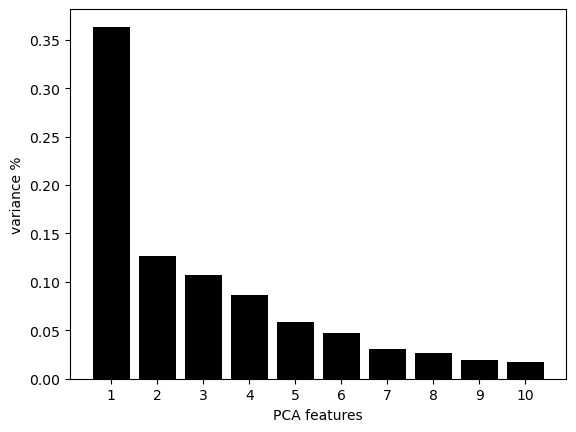

In [26]:
cm.pca_component_check(X_ribo , components=10)

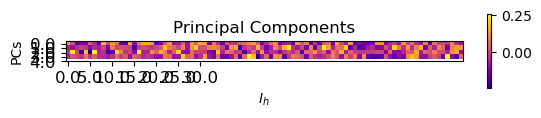

In [27]:
# We will do the first 4 components only, Drop in variance at feature 5

pca_ribo = PCA(n_components=4)
principal_components = pca_ribo.fit_transform(X_ribo)
PCA_components_pd_r3 = pd.DataFrame(principal_components)
components = pca_ribo.components_
cm.view_components(components)

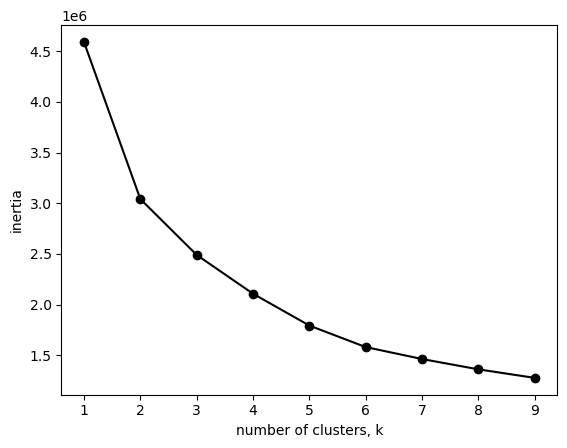

In [28]:
# KMeans on Transformed Sequences
from sklearn.cluster import KMeans

ks = range(1, 10)
inertias = []
for k in ks:
    # Create a KMeans instance with k clusters: model
    model = KMeans(n_clusters=k)

    # Fit model to samples
    model.fit(PCA_components_pd_r3.iloc[:, :4])

    # Append the inertia to the list of inertias
    inertias.append(model.inertia_)

plt.plot(ks, inertias, '-o', color='black')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()

In [29]:
# Elbow Point is at 5 so we will run it for 4 clusters
kmeans_pca = KMeans(n_clusters=6, init="k-means++", random_state=38)
kmeans_pca.fit(principal_components)
# Add principal components to dataframe
df_pca_kmeans = pd.concat([ribo_data.reset_index(drop=True), pd.DataFrame(principal_components)], axis=1)
df_pca_kmeans.columns.values[-4:] = ["Component 1", "Component 2", "Component 3", "Component 4"]
# Add labels from kmeans
df_pca_kmeans["K-mean PCA Label"] = kmeans_pca.labels_
# Replace integer with label in new column
df_pca_kmeans["Segment"] = df_pca_kmeans["K-mean PCA Label"].map({0:1, 1:2, 2:3, 3:4, 4:5, 5:6})

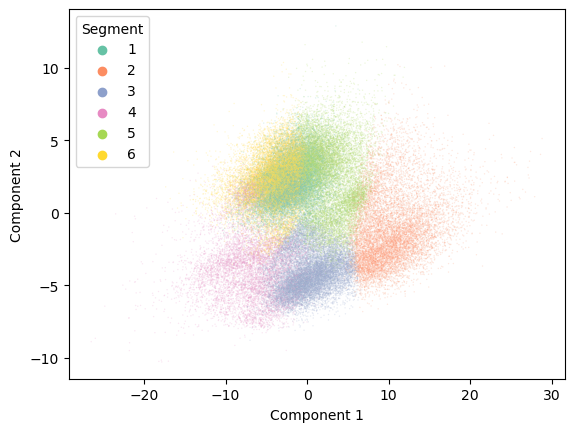

In [30]:
sns.scatterplot(data=df_pca_kmeans, x="Component 1", y="Component 2", hue="Segment", alpha=0.2, s=1, palette="Set2")
plt.show()

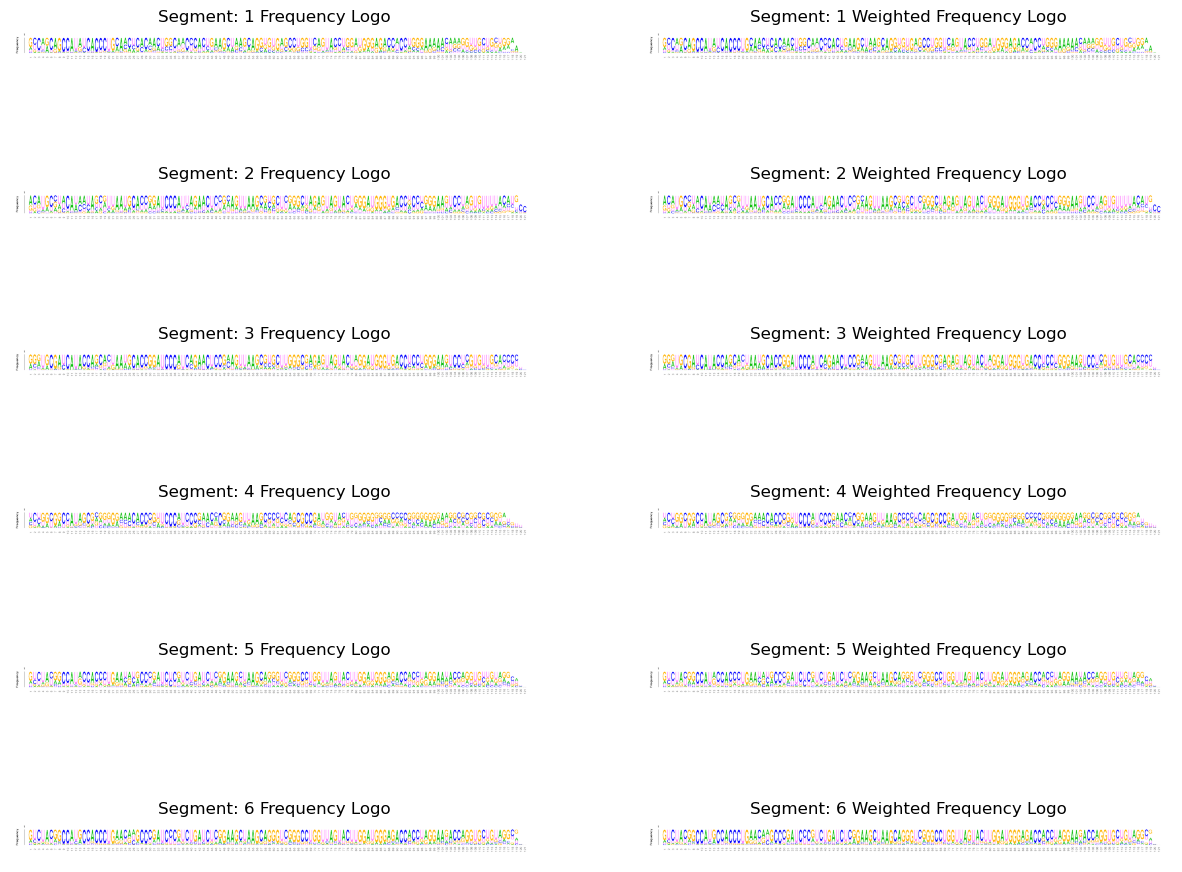

In [34]:
segments = [1, 2, 3, 4, 5, 6]

def seq_logo(dataframe, output_file, weight=False, outdir=""):
    out = outdir + output_file
    df = dataframe[["sequence", "copynum"]]
    if df.empty:
        print("No sequences found in provided dataframe")
        exit(-1)
    else:
        df.to_csv('tmp.csv', sep='\t', index=False, header=False)
        if weight:
            sp.check_call(f"/home/jonah/kpLogo/bin/kpLogo tmp.csv -simple -o {out} -alphabet ACDEFGHIKLMNPQRSTVWYU- -fontsize 20 -seq 1 -weight 2", shell=True)
        else:
            sp.check_call(f"/home/jonah/kpLogo/bin/kpLogo tmp.csv -simple -o {out} -alphabet ACDEFGHIKLMNPQRSTVWYU- -fontsize 20 -seq 1", shell=True)
        sp.check_call("rm tmp.csv", shell=True)
        return out

# Generate Sequence Logo for Each Cluster
pca_paths_u, pca_paths_w = [], []
for seg in segments:

    pca_paths_u.append(seq_logo(df_pca_kmeans[df_pca_kmeans["Segment"] == seg], f"pca_ribo_c{seg}_seqlogo", weight=False, outdir="./generated/"))
    pca_paths_w.append(seq_logo(df_pca_kmeans[df_pca_kmeans["Segment"] == seg], f"pca_ribo_c{seg}_seqlogo", weight=True, outdir="./generated/"))


# Seq Logo showing Frequency of Each Amino Acid at each position
fig, axs = plt.subplots(len(segments), 2)
fig.set_size_inches(15, 12)

for rid, r in enumerate(segments):
    img1 = mpimg.imread(f"{pca_paths_u[rid]}.freq.png")
    img2 = mpimg.imread(f"{pca_paths_w[rid]}.freq.png")
    axs[rid][0].imshow(img1)
    axs[rid][1].imshow(img2)
    axs[rid][0].axis("off")
    axs[rid][1].axis("off")
    axs[rid][0].set_title(f"Segment: {r} Frequency Logo")
    axs[rid][1].set_title(f"Segment: {r} Weighted Frequency Logo")

plt.show()